# Pymaceuticals Inc.
---

### Analysis

As we can see from the averages of end tumor weight Ramicain and Capomulin compared to all other drug regimens these two seem much more effective at treating tumor size. 

Secondly, in the linear regression we can see a clear relationship between weight of the mice and the volume of their tumors. 

Finally, from the linegraph of tumor size over time using Capomulin we can see a clear negative relationship meaning it is actually effective at treating tumors.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "C:/Users/dreww/Desktop/DataAnalysisWork/Assignments/Matlibplot files/Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "C:/Users/dreww/Desktop/DataAnalysisWork/Assignments/Matlibplot files/Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



# Combine the data into a single DataFrame
mouse_merged = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])


# Display the data table for preview
mouse_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = len(mouse_merged["Mouse ID"].unique())
print(num_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_merged[mouse_merged.duplicated(subset=['Mouse ID', 'Timepoint'])]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
print(duplicate_mouse_ids)

['g989']


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice = mouse_merged.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

In [6]:
# Checking the number of mice in the clean DataFrame.
num_unique = len(cleaned_mice["Mouse ID"].unique())
print(num_unique)

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_grouped = cleaned_mice.groupby('Drug Regimen')
mean_mice = regimen_grouped['Tumor Volume (mm3)'].mean()
median_mice = regimen_grouped['Tumor Volume (mm3)'].median()
std_mice = regimen_grouped['Tumor Volume (mm3)'].std()
variance_mice = regimen_grouped['Tumor Volume (mm3)'].var()
sem_mice = regimen_grouped['Tumor Volume (mm3)'].sem()
summary_stats = pd.DataFrame({
    "Mean": mean_mice,
    "Median": median_mice,
    "Variance": variance_mice,
    "Standard Deviation": std_mice,
    "Standard Error": sem_mice
})
print(summary_stats)

                   Mean     Median   Variance  Standard Deviation  \
Drug Regimen                                                        
Capomulin     40.675741  41.557809  24.947764            4.994774   
Ceftamin      52.591172  51.776157  39.290177            6.268188   
Infubinol     52.884795  51.820584  43.128684            6.567243   
Ketapril      55.235638  53.698743  68.553577            8.279709   
Naftisol      54.331565  52.509285  66.173479            8.134708   
Placebo       54.033581  52.288934  61.168083            7.821003   
Propriva      52.393463  50.909965  43.138803            6.568014   
Ramicane      40.216745  40.673236  23.486704            4.846308   
Stelasyn      54.233149  52.431737  59.450562            7.710419   
Zoniferol     53.236507  51.818479  48.533355            6.966589   

              Standard Error  
Drug Regimen                  
Capomulin           0.329346  
Ceftamin            0.469821  
Infubinol           0.492236  
Ketapril        

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_functions = {
    'Mean': 'mean',
    'Median': 'median',
    'Variance': 'var',
    'Standard Deviation': 'std',
    'Standard Error': 'sem'
}

# Calculate aggregated summary statistics in a single line
aggregated_summary = summary_stats.agg(agg_functions).to_frame().T

print(aggregated_summary)

        Mean     Median    Variance  Standard Deviation  Standard Error
0  50.983236  51.819532  256.955461            1.217199        0.032512


## Bar and Pie Charts

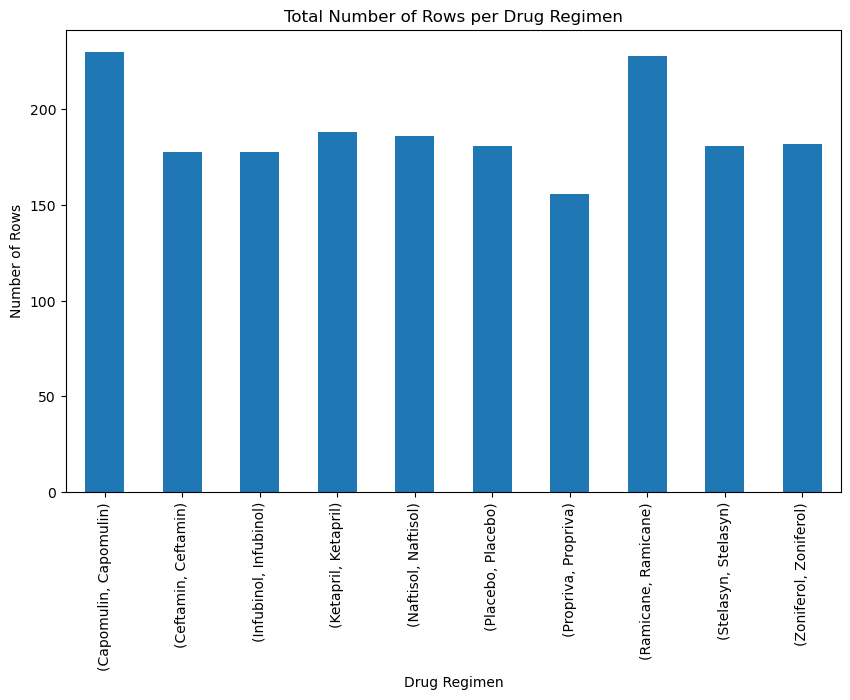

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = regimen_grouped['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Total Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.show()

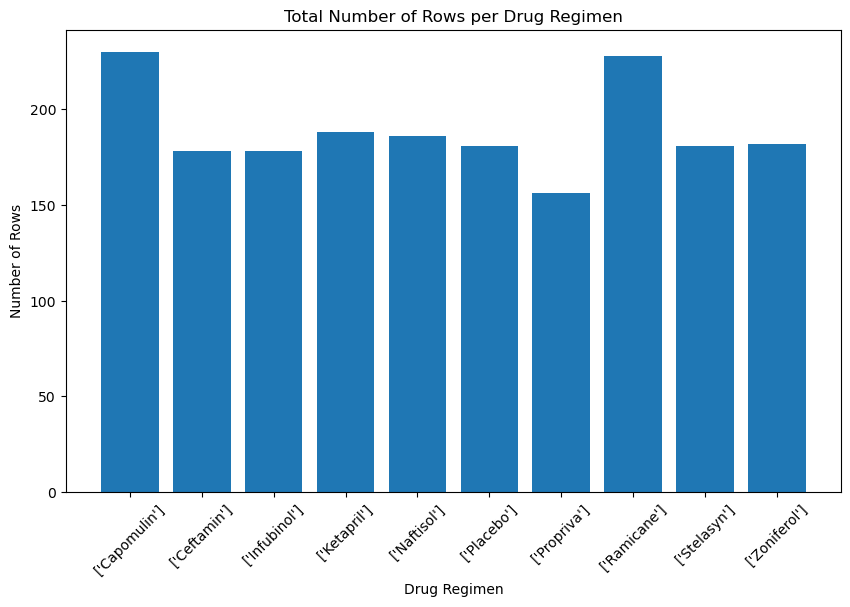

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimens = regimen_grouped['Drug Regimen'].unique()
regimen_counts = regimen_grouped['Drug Regimen'].value_counts()
plt.figure(figsize=(10, 6))  
x_positions = range(len(regimens))
plt.bar(x_positions, regimen_counts)
plt.title('Total Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(x_positions, regimens, rotation=45)
plt.show()

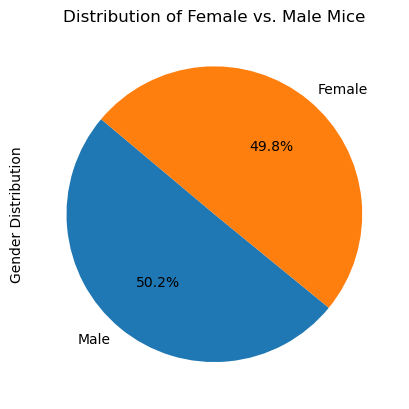

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = mouse_metadata['Sex'].value_counts()
genders = pd.DataFrame({'Gender Distribution': gender_distribution})
genders.plot(kind='pie', y='Gender Distribution', autopct='%1.1f%%', startangle=140, legend=False)
plt.title('Distribution of Female vs. Male Mice')
plt.show()

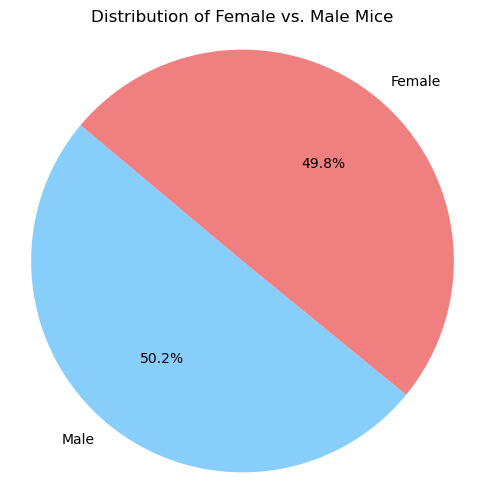

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_distribution.index
sizes = gender_distribution.values
colors = ['lightskyblue', 'lightcoral']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Female vs. Male Mice')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_mice.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_merged = pd.merge(last_timepoint, cleaned_mice, on=['Mouse ID', 'Timepoint'], how='left')



In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows for each treatment and get the tumor volumes
    tumor_volumes = last_merged[last_merged['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volumes_data.append(tumor_volumes)
    # Calculate quartiles and IQR for the treatment
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine potential outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    potential_outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Check if there are any potential outliers
    if not potential_outliers.empty:
        print(f"Potential outliers for {treatment}:")
        for index, value in potential_outliers.items():
            mouse_id = last_merged.iloc[index]['Mouse ID']
            print(f"Mouse ID: {mouse_id}, Tumor Volume: {value}")
    else:
        print(f"There are no outliers for {treatment}")
    

    

    
    


There are no outliers for Capomulin
There are no outliers for Ramicane
Potential outliers for Infubinol:
Mouse ID: c326, Tumor Volume: 36.3213458
There are no outliers for Ceftamin


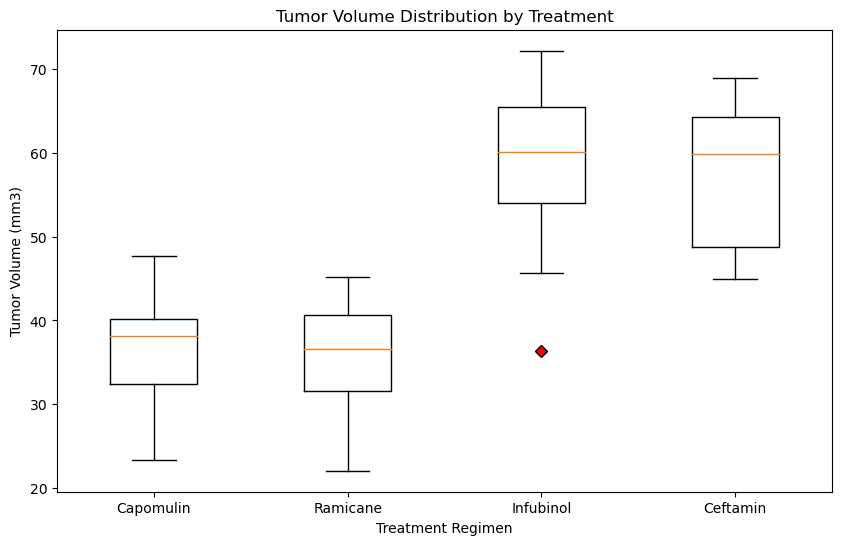

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes_data, labels=treatments, flierprops=dict(markerfacecolor='r', marker='D'))
plt.title('Tumor Volume Distribution by Treatment')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

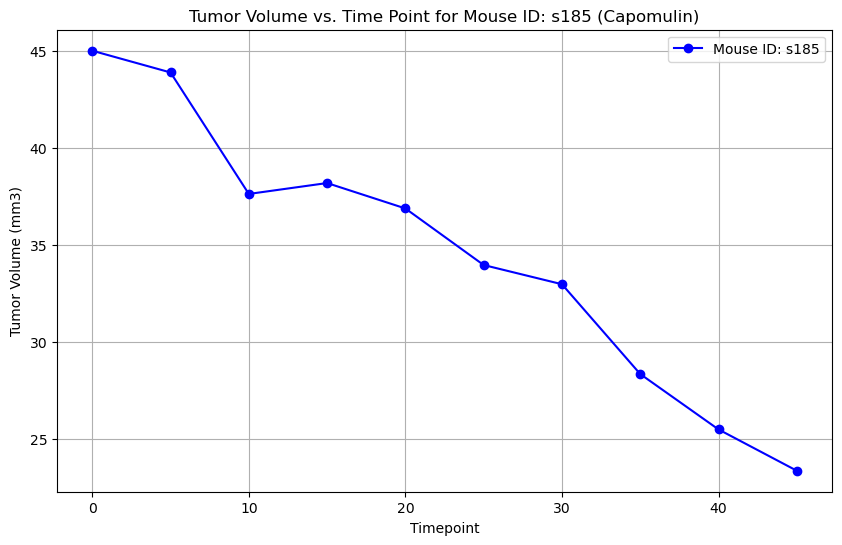

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 's185'

# Filter the DataFrame to get data for the selected mouse
capomulin_mouse_data = cleaned_mice[(cleaned_mice['Drug Regimen'] == 'Capomulin') & (cleaned_mice['Mouse ID'] == mouse_id)]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], marker='o', color='b', label=f'Mouse ID: {mouse_id}')
plt.title(f'Tumor Volume vs. Time Point for Mouse ID: {mouse_id} (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()

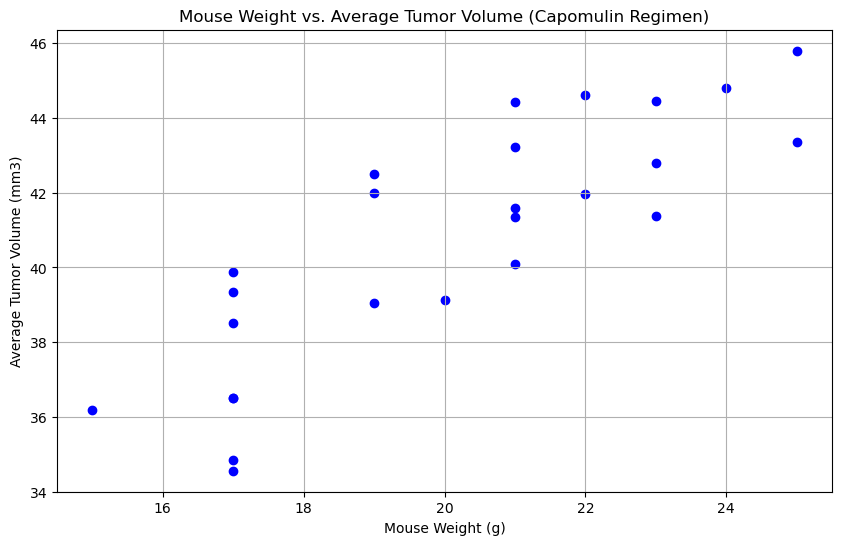

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_mice[cleaned_mice['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='b')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

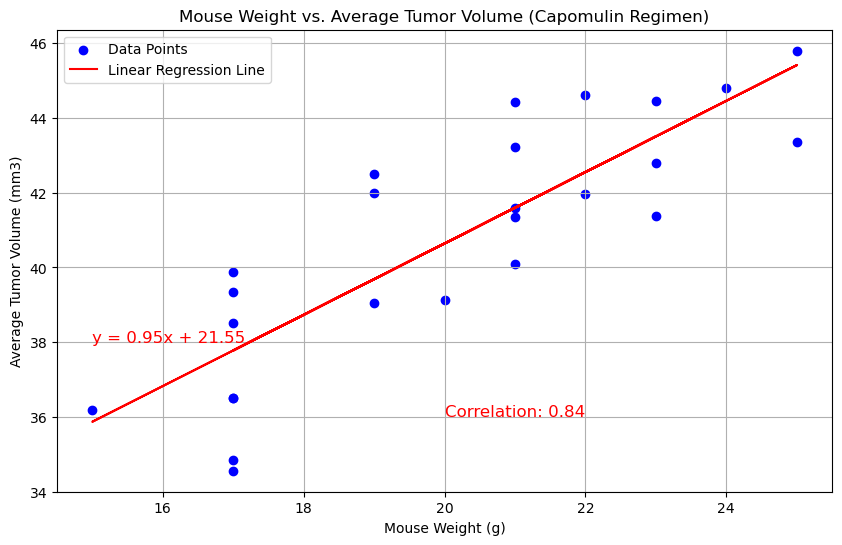

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weight, average_tumor_volume)

# Perform linear regression analysis
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='b', label='Data Points')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Plot the linear regression line
regress_values = slope * mouse_weight + intercept
plt.plot(mouse_weight, regress_values, "r-", label='Linear Regression Line')

plt.legend()

# Display correlation coefficient and regression equation on the plot
plt.annotate(f"Correlation: {correlation[0]:.2f}", (20, 36), fontsize=12, color='red')
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (15, 38), fontsize=12, color='red')

plt.grid(True)
plt.show()